# Maya Tool Install

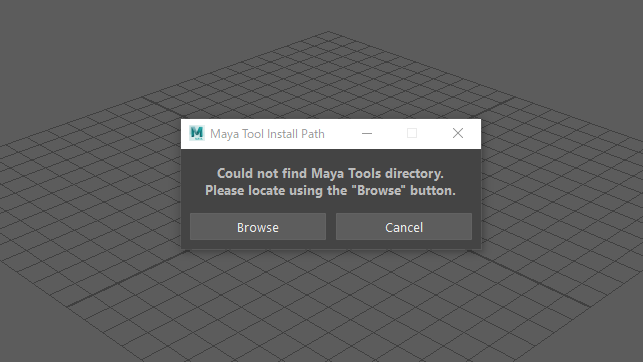

I am going to install a path of maya tool using PySide/PySide2.  
If you install a path, you can use your maya tool.

Save Directory : Documents/maya/scripts/userSetup.py

In [1]:
try:
  from PySide2.QtCore import *
  from PySide2.QtGui import *
  from PySide2.QtWidgets import *
  from PySide2 import __version__
  from shiboken2 import wrapInstance
except ImportError:
  from PySide.QtCore import *
  from PySide.QtGui import *
  from PySide import __version__
  from shiboken import wrapInstance
import maya.OpenMayaUI as mui
import maya.cmds as cmds
import os, sys

ModuleNotFoundError: No module named 'maya'

In [2]:
objectName = "mayaToolsInstall"

In [3]:
def getMayaWindow():
    pointer = mui.MQtUtil.mainWindow()
    return wrapInstance(long(pointer), QWidget)

In [4]:
def mayaTools_browse(*args):
    try:
        mayaToolsDir = cmds.fileDialog2(dialogStyle=2, fileMode=3)[0]

        # confirm that this is in fact the maya tools directory
        if mayaToolsDir.rpartition("/")[2] != "MayaTools":
            cmds.warning("Selected directory is not the MayaTools directory. Please try again.")
        else:
            cmds.deleteUI(objectName)

            # create the text file that contains the maya tools directory path
            path = cmds.internalVar(upd=True) + "MayaTools.txt"

            f = open(path, "w")
            f.write(mayaToolsDir)
            f.close()

            # run setup
            import mayaSetup
            mayaSetup.setupTools()
    except:
        # press cancel button
        pass

In [5]:
def mayaTools_cancel(*args):
    cmds.deleteUI(objectName, wnd=True)

In [6]:
def mayaTools_UI():
    # check to see if the UI already exists and if so, delete
    if cmds.window(objectName, exists=True):
        cmds.deleteUI(objectName, wnd=True)

    # create the window
    parent = getMayaWindow()
    window = QMainWindow(parent)
    window.setObjectName(objectName)
    window.setWindowTitle("Maya Tool Install Path")
    window.setMinimumSize(300, 100)
    window.setMaximumSize(300, 100)

    # create the main widget
    mainWidget = QWidget()
    window.setCentralWidget(mainWidget)

    # create our main vertical layout
    verticalLayout = QVBoxLayout(mainWidget)

    # create label
    label = QLabel("Could not find Maya Tools directory. \nPlease locate using the \"Browse\" button.")
    label.setAlignment(Qt.AlignCenter)
    verticalLayout.addWidget(label)

    # create font and assign
    font = QFont()
    font.setPointSize(10)
    font.setBold(True)
    label.setFont(font)

    # create add the horizontal layout
    layout = QHBoxLayout()
    verticalLayout.addLayout(layout)

    # create the "cancelButton" button
    browseButton = QPushButton("Browse")
    layout.addWidget(browseButton)
    font2 = QFont()
    font2.setPointSize(10)
    browseButton.setFont(font2)
    browseButton.clicked.connect(mayaTools_browse)

    # create the "cancelButton" button
    cancelButton = QPushButton("Cancel")
    layout.addWidget(cancelButton)
    cancelButton.setFont(font2)
    cancelButton.clicked.connect(mayaTools_cancel)

    # show the window
    window.show()

In [7]:
def mayaTools():
    path = cmds.internalVar(upd=True) + "mayaTools.txt"
    if os.path.exists(path):
        f = open(path, "r")
        mayaToolsDir = f.readline()

        path = mayaToolsDir + "/General/Scripts"

        if os.path.exists(path):
            if not path in sys.path:
                sys.path.append(path)
        # run setup
        import mayaSetup
        mayaSetup.setupTools()
    else:
        mayaTools_UI()

In [8]:
scriptJobNum = cmds.scriptJob(event=["NewSceneOpened", mayaTools])

NameError: name 'cmds' is not defined